In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

# DFT

In [2]:
# Computes the 2D discrete Fourier transform
def DFT2D(f):
    # create empty array of complex coefficients
    F = np.zeros(f.shape, dtype=np.complex64)
    n,m = f.shape[0:2]
    
    # creating indices for x, to compute multiplication using numpy (f*exp)
    x = np.arange(n)
    # for each frequency 'u,v'
    for u in np.arange(n):
        for v in np.arange(m):
            for y in np.arange(m):
                F[u,v] += np.sum(f[:,y] * np.exp( (-1j*2*np.pi) * (((u*x)/n)+((v*y)/m)) ))
                
    return F/np.sqrt(n*m)

# Inverse DFT 

In [3]:
# Computes the inverse 2D discrete Fourier transform
def inverse_DFT2D(F):
    
    f = np.zeros(F.shape, dtype=np.complex64)
    n,m = f.shape[0:2]
    
    x = np.arange(n)
    
    for u in np.arange(n):
        for v in np.arange(m):
            for y in np.arange(m):
                f[u, v] += np.sum(F[:,y] * np.exp( (1j*2*np.pi) * (((u*x)/n)+((v*y)/m)) ))
    
    return f/np.sqrt(n*m)

# Finding 2p

In [35]:
# Finds second peak of a given fourier spectrum
def find_2p(F):
    # Flattens the spectrum
    flat = np.reshape(F, F.shape[0] * F.shape[1])
    
    return np.amax(np.real(np.abs(flat[1:flat.shape[0]])))

# Execution 

In [25]:
f = imageio.imread("images/gradient_noise_small.png")

F = DFT2D(f)
invF = inverse_DFT2D(F)

# Testing 

In [ ]:
plt.figure(figsize=(18,10))

plt.subplot(141)
plt.imshow(f, cmap='gray')

plt.subplot(142)
plt.imshow(np.abs(F)**2, cmap='gray')

plt.subplot(143)
plt.imshow(np.log(1 + np.fft.fftshift(np.abs(F))), cmap='gray')

plt.subplot(144)
plt.imshow(np.abs(invF), cmap='gray')


In [ ]:
lol = np.reshape(F, F.shape[0]*F.shape[1])

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(311)
plt.plot(np.arange(lol.shape[0]), np.abs(lol))

plt.subplot(312)
plt.plot(np.arange(int(lol.shape[0]/2)), np.abs(lol[:512]))

plt.subplot(313)
plt.plot(np.arange(100), np.abs(lol[:100]))

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(411)
plt.plot(np.arange(100), np.real(np.abs(lol[:100])))

plt.subplot(412)
plt.plot(np.arange(99), np.real(np.abs(lol[1:100])))

plt.subplot(413)
plt.plot(np.arange(98), np.real(np.abs(lol[2:100])))

plt.subplot(414)
plt.plot(np.arange(97), np.real(np.abs(lol[3:100])))

In [ ]:
np.argmax(np.real(np.abs(lol[1:100])))

In [18]:
a = np.random.randint(0, 53, (25,))

In [20]:
a = np.reshape(a, (5, 5))

In [39]:
a = np.reshape(F, F.shape[0]*F.shape[1])

In [48]:
np.argmax(np.real(np.abs(a[1:a.shape[0]])))

31

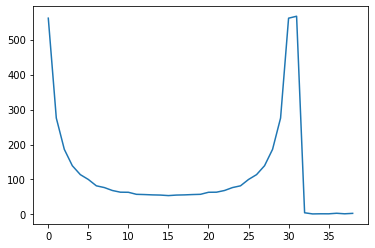

In [51]:
plt.plot(np.arange(39), np.abs(a[1:40]))